In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

In [2]:
def show(image, title="image"):
    cv2.imshow(title,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
def show_all(images, titles):
    for i in range(len(images)):
        show(images[i], titles[i])

In [4]:
## rhodamine dye mixing

In [45]:
img = cv2.imread('./images/rhodamine.png', cv2.IMREAD_COLOR)

b,g,r = cv2.split(img)

w_r=2
w_b=1
w_g=1.8

weighted_image = w_r * r + w_b * r + w_g * g

weighted_image = cv2.normalize(weighted_image, None, 0, 255, cv2.NORM_MINMAX)

weighted_image = np.uint8(weighted_image)

# bwimg = cv2.cvtColor(weighted_image, cv2.COLOR_BGR2GRAY)

equalized_image = cv2.equalizeHist(weighted_image)

blurred_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)



In [46]:
images = [img, equalized_image, blurred_image]
titles = ["orginal", "equalized", "blurred"]
show_all(images, titles)

In [47]:
def binarize(threshold=100):
    _, binary_thresh = cv2.threshold(bwimg, threshold, 255, cv2.THRESH_BINARY)
    
    plt.imshow(binary_thresh)

In [48]:
w  = interactive(binarize, threshold=(80, 200))
w

interactive(children=(IntSlider(value=100, description='threshold', max=200, min=80), Output()), _dom_classes=…

In [49]:
_, thresholded_image = cv2.threshold(equalized_image, 141, 255, cv2.THRESH_BINARY)
show(thresholded_image)

In [53]:
kernel = np.ones((2, 2), np.uint8)
opened = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)
show(opened, "open")
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [54]:
output_image = img.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)
show(output_image, "output")

In [30]:
B,G,R = cv2.split(img)

def bias(w_r=1, w_b=1, w_g=1):
    weighted_image = w_r * R + w_b * B - w_g * G

    weighted_image = cv2.normalize(weighted_image, None, 0, 255, cv2.NORM_MINMAX)

    weighted_image = np.uint8(weighted_image)
    image_rgb = cv2.cvtColor(weighted_image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)

In [32]:
w = interactive(bias, w_r=(0,2, 0.2), w_b=(0,2,0.2), w_g=(-1,2,0.2))
w

interactive(children=(FloatSlider(value=1.0, description='w_r', max=2.0, step=0.2), FloatSlider(value=1.0, des…

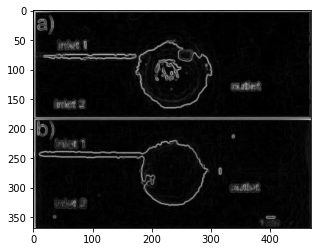

In [58]:
# Gradient detection using Sobel operator
sobelx = cv2.Sobel(weighted_image, cv2.CV_64F, 1, 0, ksize=5) 
sobely = cv2.Sobel(weighted_image, cv2.CV_64F, 0, 1, ksize=5) 
sobel_magnitude = np.sqrt(sobelx**2 + sobely**2)  

plt.imshow(sobel_magnitude, cmap='gray')

In [81]:
countours, _ = cv2.findContours(bwimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
output_image = img.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

show(output_image, "output")

In [59]:
## x-Rays

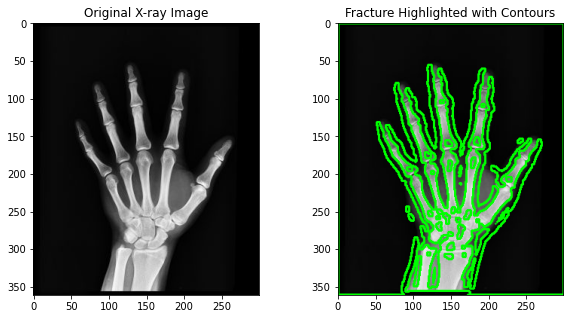

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

xray_image = cv2.imread('./images/xray.jpg', cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(xray_image, (11,11), 0)

adaptive_thresh = cv2.adaptiveThreshold(blurred_image, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)

kernel = np.ones((3, 3), np.uint8)
closed_image = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closed_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

output_image = cv2.cvtColor(xray_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(xray_image, cmap='gray')
plt.title('Original X-ray Image')

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Fracture Highlighted with Contours')
plt.show()

In [106]:
imp_contour = []
best = contours[0]
max_area = -1
for contour in contours:
    area = cv2.contourArea(contour)
    if area>max_area:
        best = contour
        max_area = area

In [107]:
max_area

2615.5

In [108]:
imp_contour.append(best)

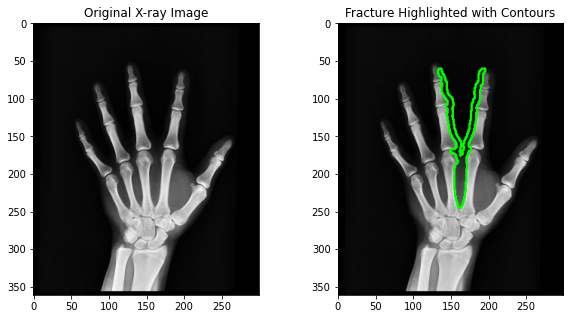

In [109]:
output_image = cv2.cvtColor(xray_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output_image, imp_contour, -1, (0, 255, 0), 2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(xray_image, cmap='gray')
plt.title('Original X-ray Image')

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Fracture Highlighted with Contours')
plt.show()

In [110]:
## angiogram

Average thickness: 3.04 pixels
Max thickness: 9.30 pixels


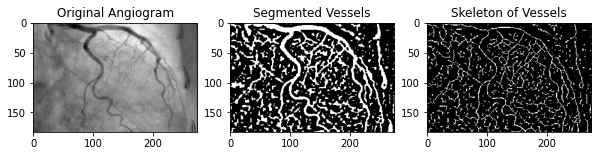

In [112]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

angiogram = cv2.imread('./images/angiogram.jpeg', cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(angiogram, (5, 5), 0)

adaptive_thresh = cv2.adaptiveThreshold(blurred, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY_INV, 11, 2)

kernel = np.ones((3, 3), np.uint8)
closed = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)

def skeletonize(image):
    size = np.size(image)
    skel = np.zeros(image.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False

    while not done:
        eroded = cv2.erode(image, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(image, temp)
        skel = cv2.bitwise_or(skel, temp)
        image = eroded.copy()

        zeros = size - cv2.countNonZero(image)
        if zeros == size:
            done = True

    return skel

skeleton = skeletonize(closed)

dist_transform = cv2.distanceTransform(closed, cv2.DIST_L2, 3)

contours, _ = cv2.findContours(skeleton, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

thickness_list = []

for contour in contours:
    # Extract points of the contour
    for point in contour:
        x, y = point[0]
        # Measure the distance at this point (this gives half the thickness)
        thickness = dist_transform[y, x] * 2  # Multiply by 2 to get full thickness
        thickness_list.append(thickness)

if thickness_list:
    avg_thickness = np.mean(thickness_list)
    max_thickness = np.max(thickness_list)
else:
    avg_thickness = 0
    max_thickness = 0

print(f"Average thickness: {avg_thickness:.2f} pixels")
print(f"Max thickness: {max_thickness:.2f} pixels")

# Step 10: Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(angiogram, cmap='gray')
plt.title('Original Angiogram')

plt.subplot(1, 3, 2)
plt.imshow(closed, cmap='gray')
plt.title('Segmented Vessels')

plt.subplot(1, 3, 3)
plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton of Vessels')

plt.show()